<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<center><font size="8pt">Classification with Support Vector Machine</font></center>

# Introduction 

This `R` tutorial deals with Support Vector Machine (SVM) for classification. The aim is to illustrate the importance of the kernel choice and the tuning of the parameters by cross validation on different simulated data. 

It uses the `svm()` function of the `e1071` package. 

## About the `svm()` function

**Q:** Load the `e1071` package. What kernels does it contain?

In [1]:
library(e1071)

## Factor simulation

In the following, the factors $(X_i)_{1\leq i\leq n}$ are the same in all cases and are uniformly distributed on $[-1,1]\times [0,1]$. The difference between the different cases lies in the boundary form which classifies the points. We simulate a training set with `n=200` observations, and a test set with `ntest=100` points. 

In [2]:
# Training set:
n <- 200
x1 <- runif(n, min=-1, max=1)
x2 <- runif(n, min=0, max=1)
t <- seq(-1, 1, length=100)

# Test set:
ntest <- 100
x1test <- runif(ntest, min=-1, max=1)
x2test <- runif(ntest, min=0, max=1)

# Linear boundary

First, we assume that the points are linearly separated. 

## Data simulation

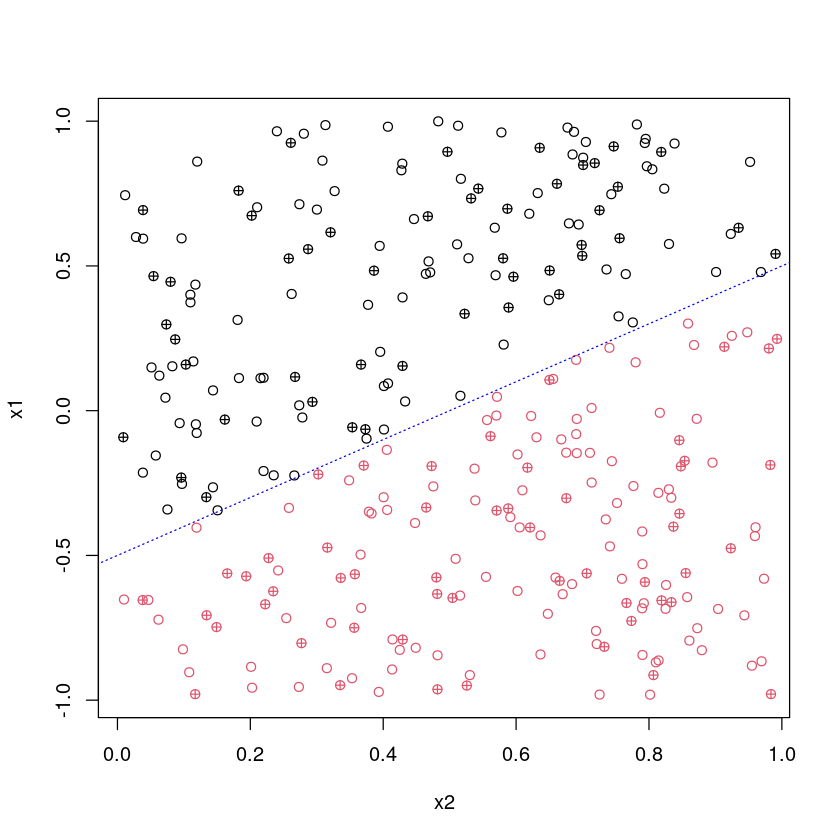

In [3]:
boundFunLin <- function(x1){
  x1 + 0.5
}

# Training set
gLin <- as.factor(x2 > boundFunLin(x1))
dataTrainLin <- data.frame(x1 = x1, x2 = x2, g = gLin)
plot(x2, x1, col=as.numeric(gLin))
lines(boundFunLin(t), t, col="blue", lty = "dotted")

# Test set
gLintest <- as.factor(x2test > boundFunLin(x1test))
dataTestLin <- data.frame(x1 = x1test, x2 = x2test, g = gLintest)
points(x2test, x1test, col=as.numeric(gLintest),pch=10)


## Linear SVM

We first use a linear kernel. 

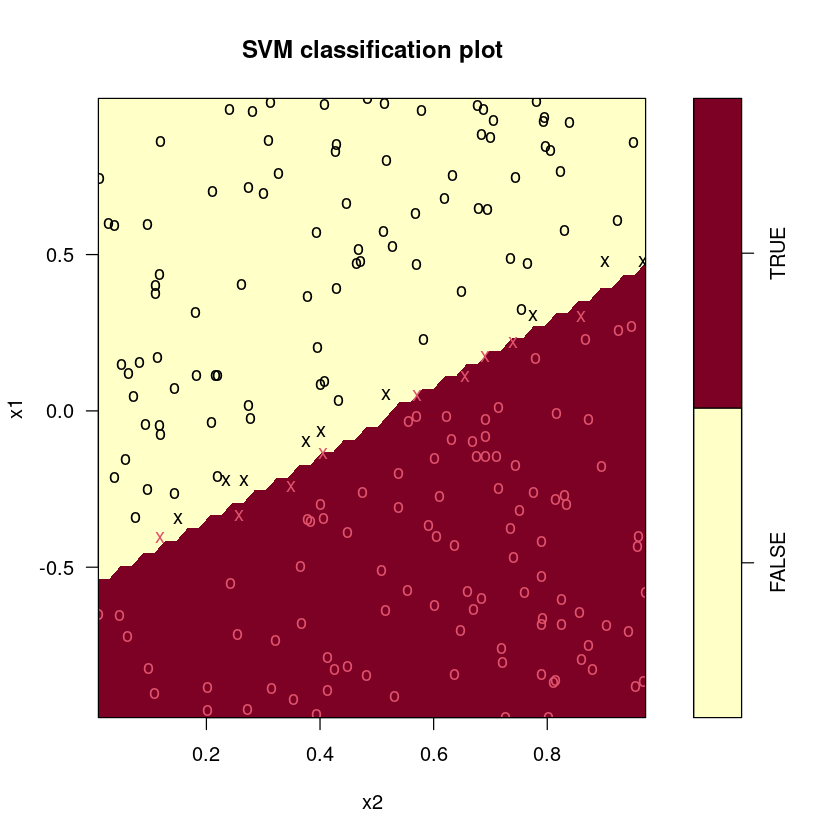

In [16]:
svm.model <- svm(g ~ ., data = dataTrainLin, type = "C", kernel = "lin", cross = 5 ,cost =10)
plot(svm.model, data = dataTrainLin)

In [35]:
help(svm)

svm {e1071},R Documentation
formula,a symbolic description of the model to be fit.
data,an optional data frame containing the variables in the model. By default the variables are taken from the environment which ‘svm’ is called from.
x,"a data matrix, a vector, or a sparse matrix (object of class Matrix provided by the Matrix package, or of class matrix.csr provided by the SparseM package, or of class simple_triplet_matrix provided by the slam package)."
y,a response vector with one label for each row/component of x. Can be either a factor (for classification tasks) or a numeric vector (for regression).
scale,"A logical vector indicating the variables to be scaled. If scale is of length 1, the value is recycled as many times as needed. Per default, data are scaled internally (both x and y variables) to zero mean and unit variance. The center and scale values are returned and used for later predictions."
type,"svm can be used as a classification machine, as a regression machine, or for novelty detection. Depending of whether y is a factor or not, the default setting for type is C-classification or eps-regression, respectively, but may be overwritten by setting an explicit value. Valid options are: C-classification nu-classification one-classification (for novelty detection) eps-regression nu-regression"
kernel,"the kernel used in training and predicting. You might consider changing some of the following parameters, depending on the kernel type. linear:u'v polynomial:(\gamma u'v + coef0)^{degree} radial basis:e^(-\gamma |u-v|^2) sigmoid:tanh(\gamma u'v + coef0)"
degree,parameter needed for kernel of type polynomial (default: 3)
gamma,parameter needed for all kernels except linear (default: 1/(data dimension))
coef0,parameter needed for kernels of type polynomial and sigmoid (default: 0)


In [18]:
summary(svm.model)


Call:
svm(formula = g ~ ., data = dataTrainLin, type = "C", kernel = "lin", 
    cross = 5, cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  18

 ( 9 9 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 99 
Single Accuracies:
 97.5 100 100 97.5 100 




**Q:** How many support vectors are there? How are they represented on the plot? 
What is their minimal number? Can you change the parameters, such that this minimal number is achieved?

On a 3 vecteurs supports, ils sont représentés par des croix sur notre plot. 

**Q:** What are the `Single Accuracies` and the `Total Accuracy` in the `summary`? Why should we do some cross validation, even though there are no parameters to calibrate in the linear model?

On fait de la cross validation pour déterminer la qualité de notre modèle. Reconnaître la meilleure valeur de C (en trouvant la variance et la moyenne).

**Q:** Verify that the fitted values are equal to the sign of the decision values. 

In [19]:
unique((svm.model$decision.values>0) == (svm.model$fitted))

,TRUE/FALSE
1,TRUE


Note that it is possible to get the normalized support vectors. 

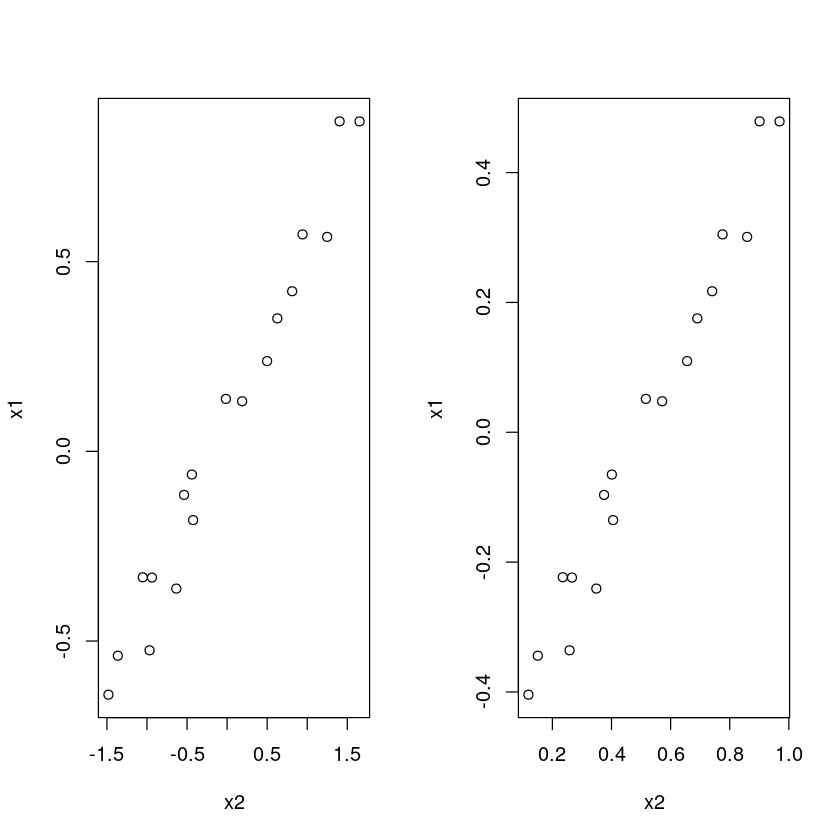

In [20]:
par(mfrow=c(1,2))
plot(x1~x2,data=svm.model$SV)
plot(x1~x2,data=dataTrainLin[svm.model$index,])

## Test set prediction

Let us now compute the contingency table and accuracy rate of `svm.model` on the test set. 

In [21]:
# Generalization error
pred.lin <- predict(svm.model,dataTestLin)
table(pred.lin,dataTestLin$g) 
paste("Generalization error: ",100*(1-sum(diag(table(pred.lin,dataTestLin$g)))/ntest),"%",sep="")

        
pred.lin FALSE TRUE
   FALSE    47    1
   TRUE      0   52

[1] "Generalization error: 1%"

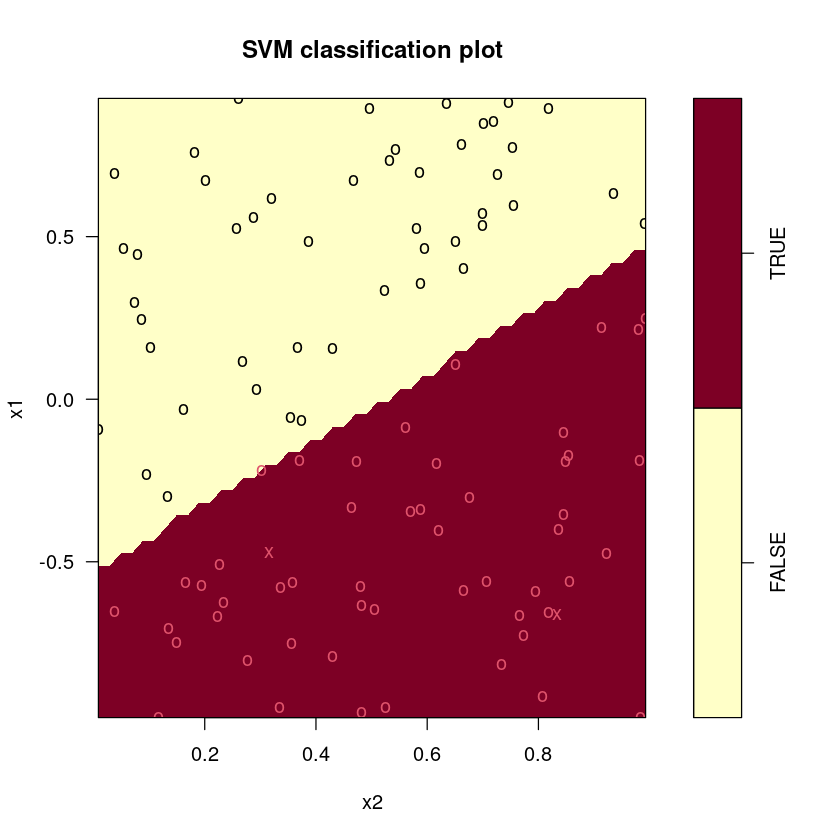

In [14]:
plot(svm.model,dataTestLin)

**Q:** Comment. 
On plot la classification pour le jeu de données test. 

# Cubic boundary

In this section, we assume that the points are separated by a cubic function (polynomial with degree 3). 

## Data simulation

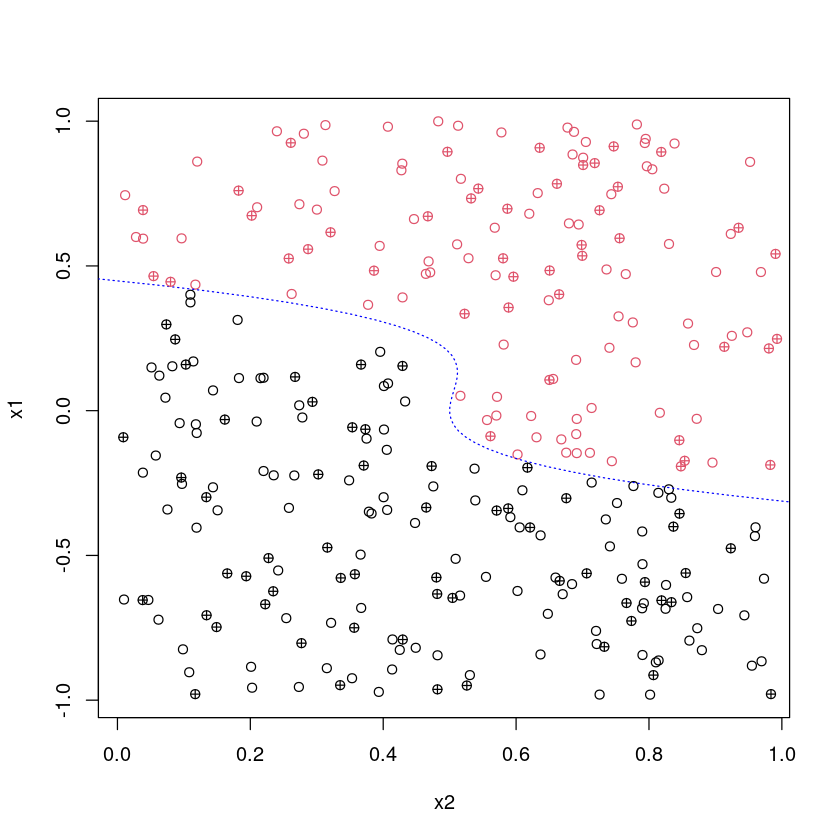

In [22]:
boundFunCub <- function(u){
  2*u^2 - 10*u^3 + 0.5
}

# Training set
gCub <- (x2 > boundFunCub(x1))
gCub <- as.factor(gCub)
dataTrainCub <- data.frame(x1 = x1, x2 = x2, g = gCub)
plot(x2, x1, col=as.numeric(gCub))
lines(boundFunCub(t), t, col="blue", lty = "dotted")

# Test set
gCubtest <- as.factor(x2test > boundFunCub(x1test))
dataTestCub <- data.frame(x1 = x1test, x2 = x2test, g = gCubtest)
points(x2test, x1test, col=as.numeric(gCubtest),pch=10)

## Linear SVM

With a linear kernel, we obtain the following.

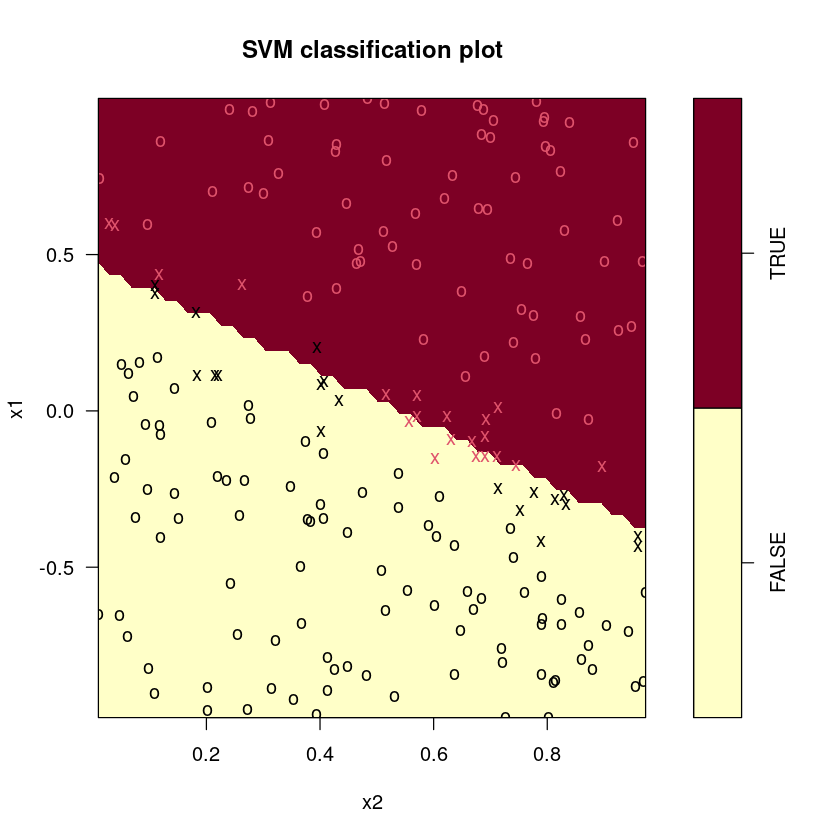

In [27]:
svm.Cub.lin <- svm(g ~ ., data = dataTrainCub, type = "C", kernel = "lin", cross = 5)
plot(svm.Cub.lin, data=dataTrainCub)

In [24]:
summary(svm.Cub.lin)


Call:
svm(formula = g ~ ., data = dataTrainCub, type = "C", kernel = "lin", 
    cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  40

 ( 20 20 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 92.5 
Single Accuracies:
 100 82.5 90 95 95 




**Q:** What is the generalization error here? Comment. 

## Polynomial SVM

Since we know here that the boundary is polynomial with degree 3, we can use a polynomial kernel.

### Polynomial kernel with default parameters

**Q:** What are the parameters of such kernel, and what is their default value?

[1] 0.5

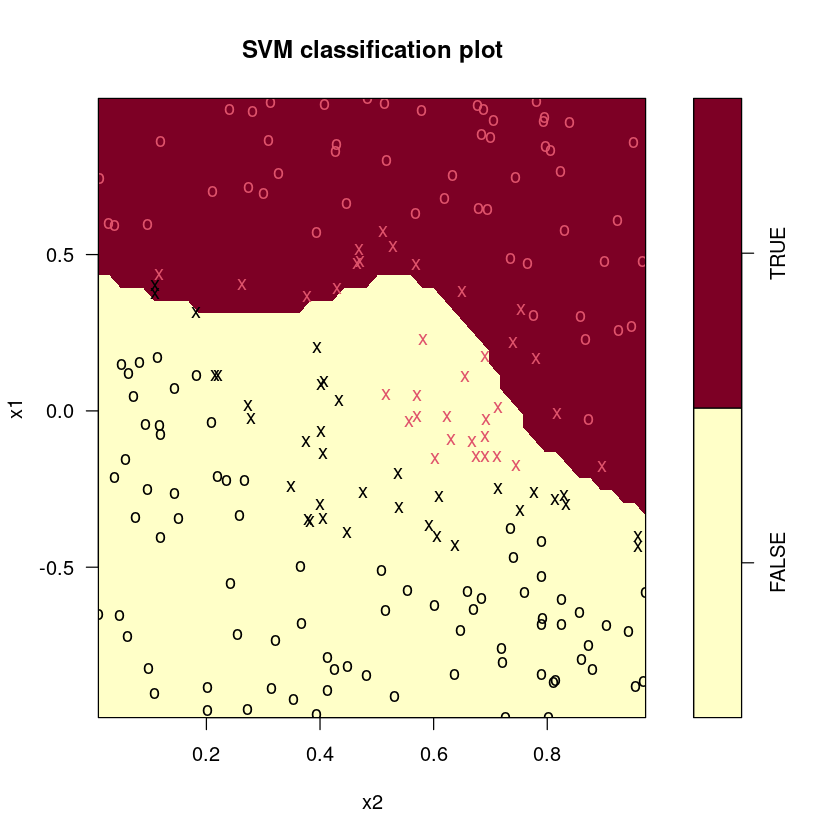

In [42]:
svm.Cub.poly <- svm(g ~ ., data = dataTrainCub, type = "C", kernel = "poly", cross = 5)
plot(svm.Cub.poly, data = dataTrainCub)
svm.Cub.poly$gamma

In [29]:
summary(svm.Cub.poly)


Call:
svm(formula = g ~ ., data = dataTrainCub, type = "C", kernel = "poly", 
    cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  69

 ( 34 35 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 89.5 
Single Accuracies:
 95 87.5 85 95 85 




**Q:** Does this model seem reasonable? What should we do to improve it?

In order to study the training error, we can print the contingency table of the fitted values. 

In [30]:
table(svm.Cub.poly$fitted,dataTrainCub$g) # Il faudrait sur échantillon test !
paste("Training error: ",round(100*(1-sum(diag(table(svm.Cub.poly$fitted,dataTrainCub$g)))/nrow(dataTrainCub)),1),"%",sep="")

       
        FALSE TRUE
  FALSE   110   17
  TRUE      3   70

[1] "Training error: 10%"

**Q:** Comment.

### Tuned model

Since we know the degree in this example, we only tune the parameter `coef0`. 

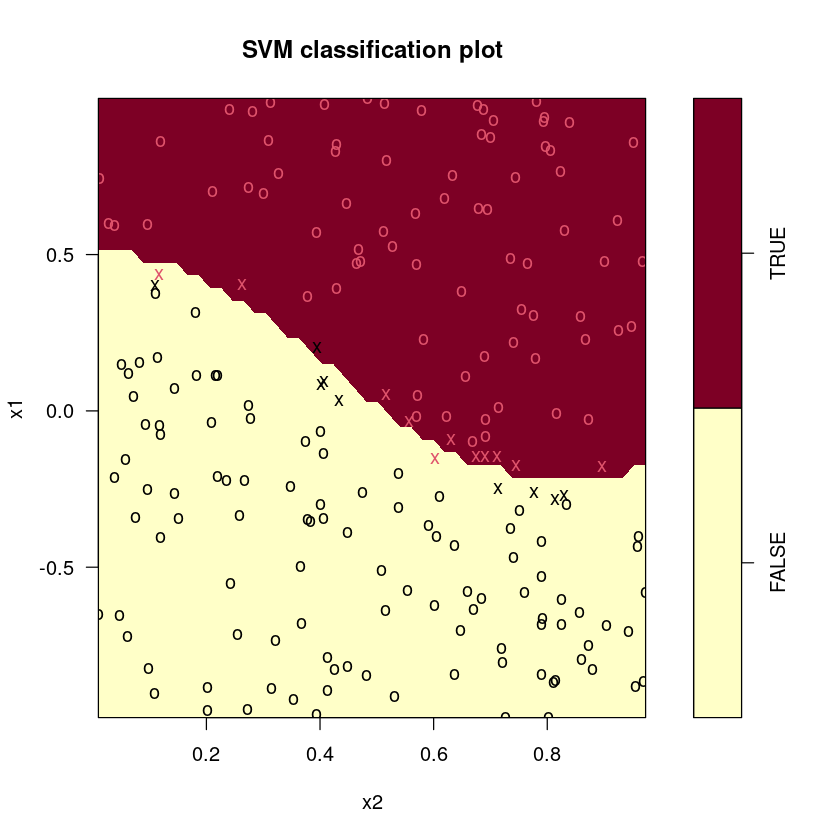

In [31]:
svm.Cub.poly.tune <- tune.svm(g ~ ., data = dataTrainCub, type = "C", kernel = "poly", coef0 = -5:5)
#il faut toujours mettre nos hyperparamètre et leur donner une grille. ici : "coef0 = -5:5".
plot(svm.Cub.poly.tune$best.model, data = dataTrainCub)

In [32]:
# print(svm.Cub.poly.tune)
summary(svm.Cub.poly.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 coef0
     4

- best performance: 0.015 

- Detailed performance results:
   coef0 error dispersion
1     -5 0.110 0.06146363
2     -4 0.125 0.06770032
3     -3 0.120 0.05374838
4     -2 0.135 0.07090682
5     -1 0.165 0.06258328
6      0 0.100 0.08164966
7      1 0.030 0.04830459
8      2 0.020 0.02581989
9      3 0.025 0.03535534
10     4 0.015 0.03374743
11     5 0.015 0.03374743


**Q:** What value of `coef0` is obtained by cross validation? What is the generalization error in this case?

On a 4 pour la valeur du coef0 qui minimise l'erreur de généralisation par validation croisée. ici valeur minimale de l'erreur : 0.015. et donc le coef0 prend pour valeur optimale 4

We can plot the generalization error (estimated by cross validation) w.r.t. `coef0`. 

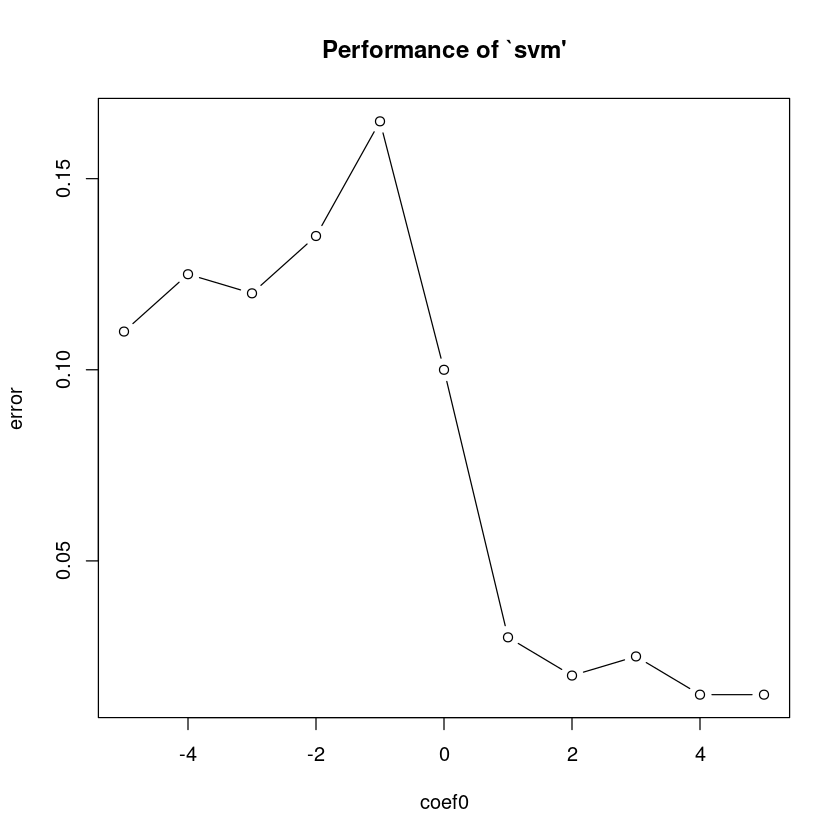

In [33]:
#svm.Cub.poly.tune$best.parameters
plot(svm.Cub.poly.tune)

**Q:** Which parameter minimizes the error?  

Le paramètre qui minimise l'erreur est coef0. Et prend pour valeur 4.

## Radial SVM 

### Radial kernel with default parameters

**Q:** What are the parameters of such kernel, and what is their default value?

Les hyperparamètres sont gamma et cost. cost a pour valeur par défaut 1. gamma a pour valeur par défaut 0.5.

[1] 0.5

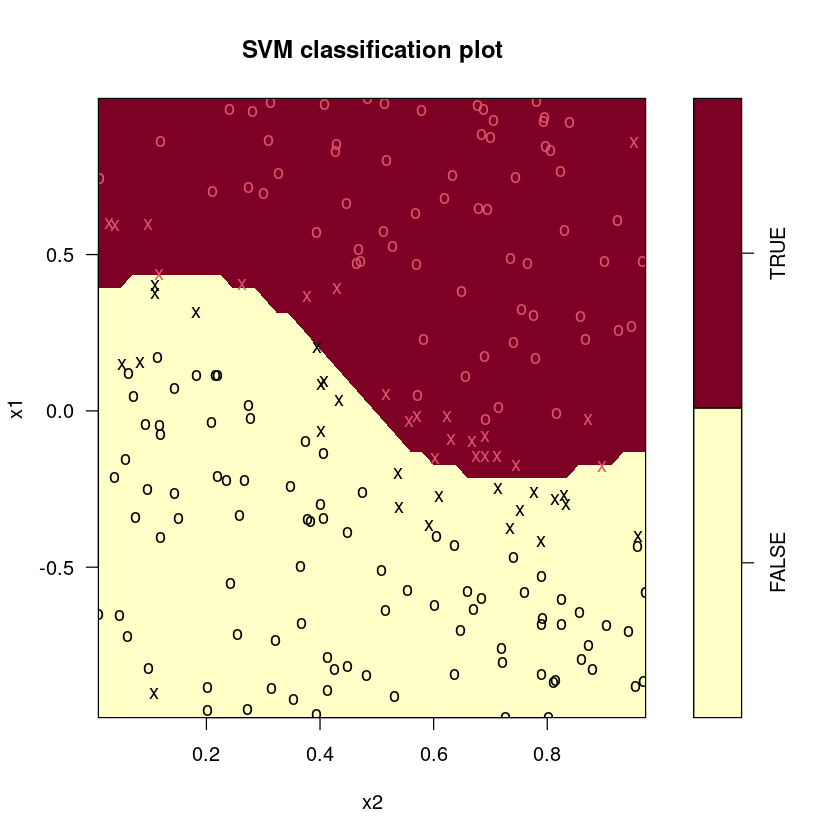

In [37]:
svm.Cub.rad <- svm(g ~ ., data = dataTrainCub, type = "C", kernel = "radial", cross = 5)
plot(svm.Cub.rad, data = dataTrainCub) 
svm.Cub.rad$gamma

In [36]:
summary(svm.Cub.rad)


Call:
svm(formula = g ~ ., data = dataTrainCub, type = "C", kernel = "radial", 
    cross = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  46

 ( 22 24 )


Number of Classes:  2 

Levels: 
 FALSE TRUE

5-fold cross-validation on training data:

Total Accuracy: 99 
Single Accuracies:
 100 100 97.5 100 97.5 




**Q:** How much is the generalization error (estimated by cross validation) here? Does the model seem reasonable?

In [38]:
pred.cub <- predict(svm.Cub.rad,dataTestCub)
table(pred.cub,dataTestCub$g) 
paste("Generalization error: ",100*(1-sum(diag(table(pred.cub,dataTestCub$g)))/ntest),"%",sep="")

        
pred.cub FALSE TRUE
   FALSE    56    1
   TRUE      1   42

[1] "Generalization error: 2%"

### Tuned model

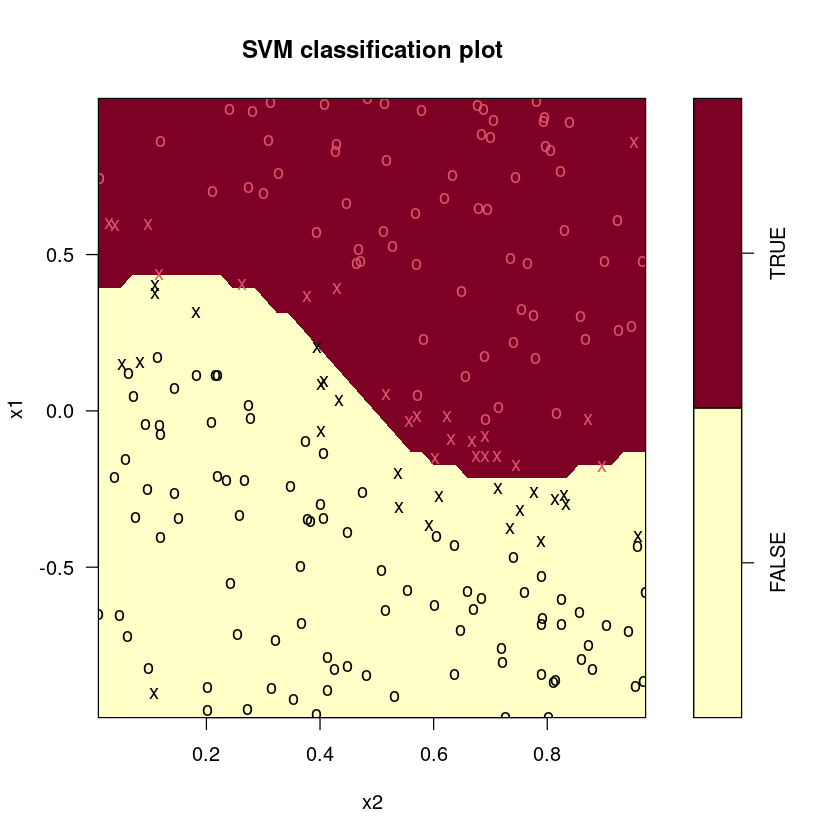

In [39]:
svm.Cub.rad.tune <- tune.svm(g ~ ., data = dataTrainCub, type = "C", kernel = "radial", gamma = seq(0.1, 2, by = 0.2))
plot(svm.Cub.rad.tune$best.model, data = dataTrainCub)

In [40]:
# print(svm.Cub.rad.tune)
summary(svm.Cub.rad.tune)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 gamma
   0.5

- best performance: 0.015 

- Detailed performance results:
   gamma error dispersion
1    0.1 0.075 0.12527747
2    0.3 0.035 0.06687468
3    0.5 0.015 0.02415229
4    0.7 0.025 0.02635231
5    0.9 0.030 0.02581989
6    1.1 0.035 0.03374743
7    1.3 0.025 0.02635231
8    1.5 0.020 0.02581989
9    1.7 0.020 0.02581989
10   1.9 0.025 0.02635231


 We can plot the estimated generalization error w.r.t. `gamma`. 

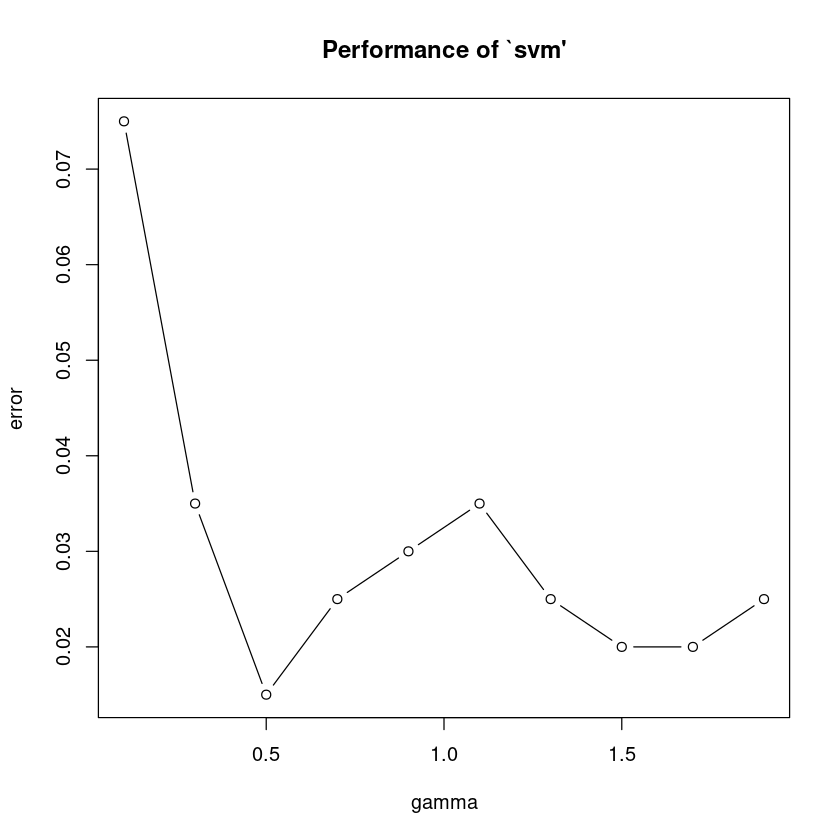

In [41]:
plot(svm.Cub.rad.tune)
# plot(error~gamma,data=svm.Cub.rad.tune$performances,type="b")
# svm.Cub.rad.tune$best.parameters

In [43]:
**Q:** Which parameter minimizes the error? What is the generalization error in that case? What is its values for the default parameter? 

**Response :** L'erreur est min pour `gamma={{svm.Cub.rad.tune$best.parameters[1,1]}}`

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: '^' inattendu(e)
1: **
    ^


## Model comparison

### Validation error (by cross validation)

Comparison of the cross-validation errors:

In [44]:
paste("Linear kernel:",100-svm.Cub.lin$tot.accuracy,"%",sep=" ")
paste("Default polynomial kernel:",100-svm.Cub.poly$tot.accuracy,"%",sep=" ")
paste("Tuned polynomial kernel:",100*(svm.Cub.poly.tune$best.performance),"%",sep=" ")
paste("Default radial kernel:",100-svm.Cub.rad$tot.accuracy,"%",sep=" ")
paste("Tuned radial kernel:",100*(svm.Cub.rad.tune$best.performance),"%",sep=" ")

[1] "Linear kernel: 4.5 %"

[1] "Default polynomial kernel: 11 %"

[1] "Tuned polynomial kernel: 1.5 %"

[1] "Default radial kernel: 1.5 %"

[1] "Tuned radial kernel: 1.5 %"

**Q:** Which model seems best?

### Test set prediction

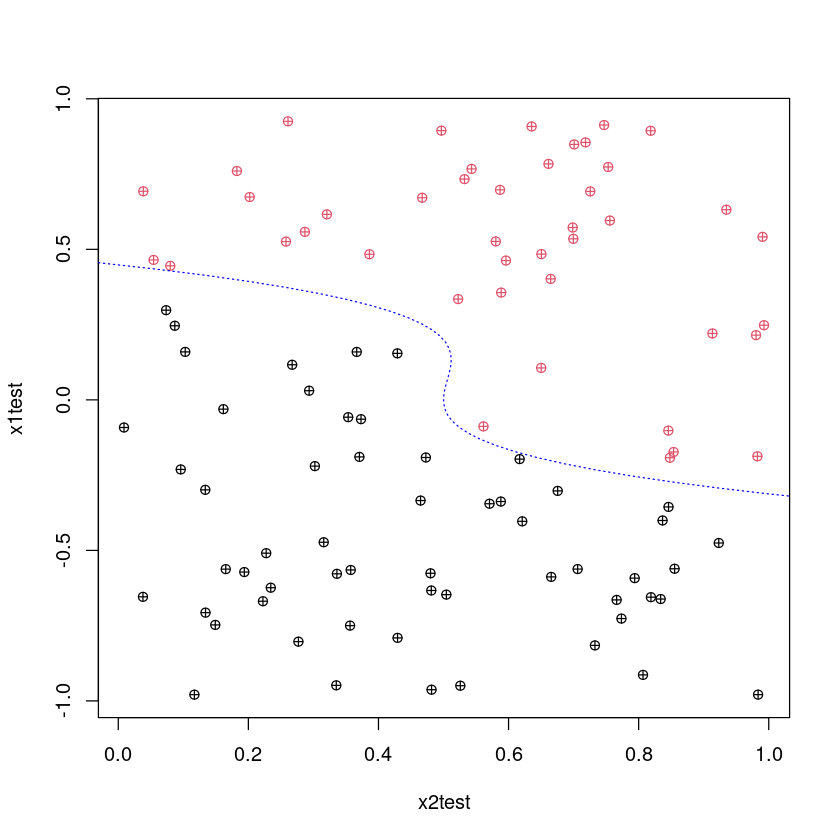

In [45]:
plot(x2test, x1test, col=as.numeric(gCubtest),pch=10)
lines(boundFunCub(t), t, col="blue", lty = "dotted")

            
pred.Cub.lin FALSE TRUE
       FALSE    55    1
       TRUE      2   42

[1] "Prediction error: 3 %"

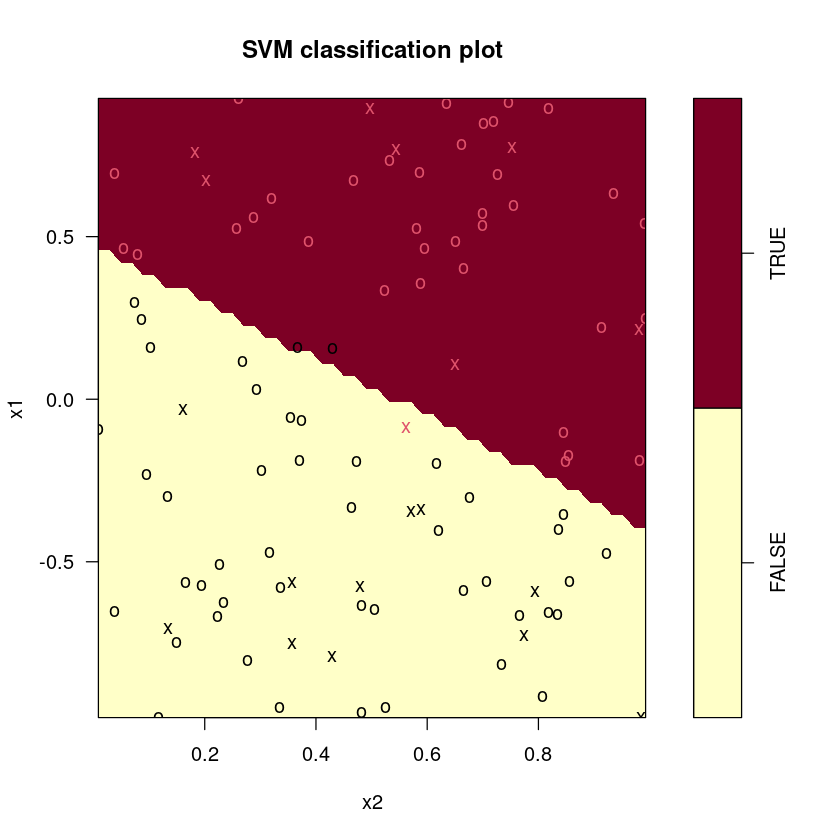

In [46]:
# Linear kernel
pred.Cub.lin <- predict(svm.Cub.lin,dataTestCub)
table(pred.Cub.lin,dataTestCub$g) 
paste("Prediction error: ",round(100*(1-sum(diag(table(pred.Cub.lin,dataTestCub$g)))/ntest),1)," %",sep="")
plot(svm.Cub.lin,dataTestCub)

             
pred.Cub.poly FALSE TRUE
        FALSE    57    4
        TRUE      0   39

[1] "Prediction error: 4 %"

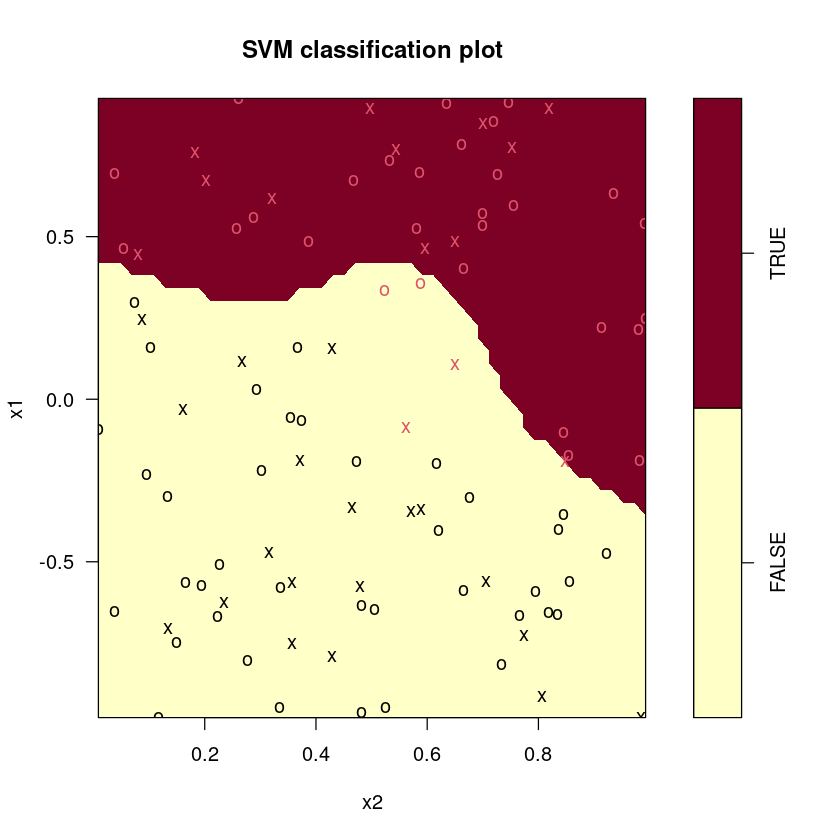

In [47]:
# Default polynomial kernel
pred.Cub.poly <- predict(svm.Cub.poly,dataTestCub)
table(pred.Cub.poly,dataTestCub$g) 
paste("Prediction error: ",round(100*(1-sum(diag(table(pred.Cub.poly,dataTestCub$g)))/ntest),1)," %",sep="")
plot(svm.Cub.poly,dataTestCub)

                  
pred.Cub.poly.tune FALSE TRUE
             FALSE    56    3
             TRUE      1   40

[1] "Prediction error: 4 %"

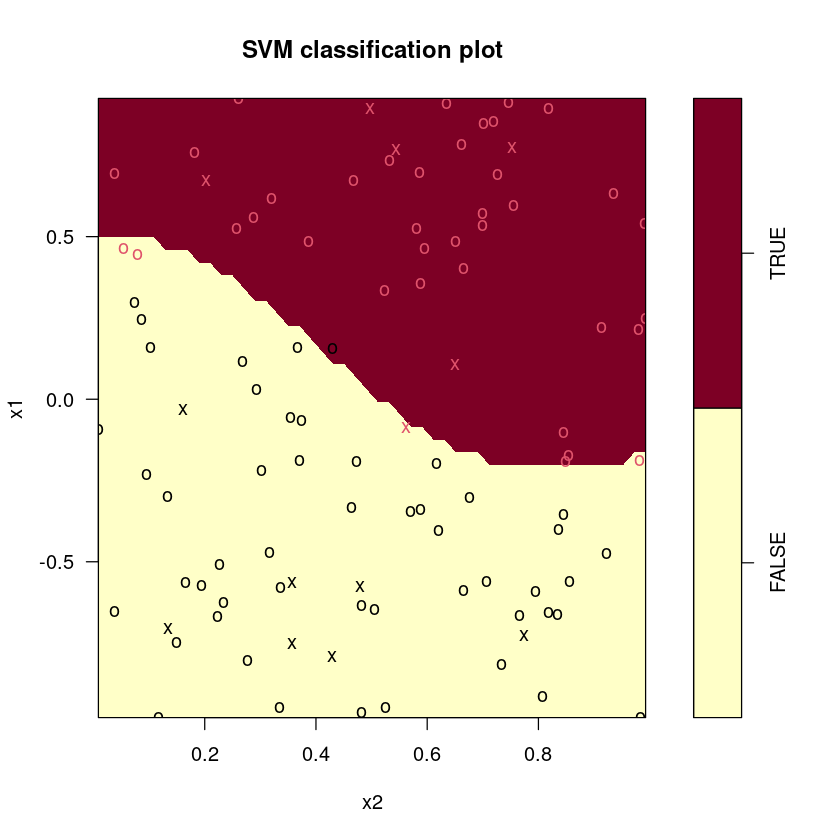

In [48]:
# Tuned polynomial kernel
pred.Cub.poly.tune <- predict(svm.Cub.poly.tune$best.model,dataTestCub)
table(pred.Cub.poly.tune,dataTestCub$g) 
paste("Prediction error: ",100*(1-sum(diag(table(pred.Cub.poly.tune,dataTestCub$g)))/ntest)," %",sep="")
plot(svm.Cub.poly.tune$best.model,dataTestCub)

            
pred.Cub.rad FALSE TRUE
       FALSE    56    1
       TRUE      1   42

[1] "Prediction error: 2 %"

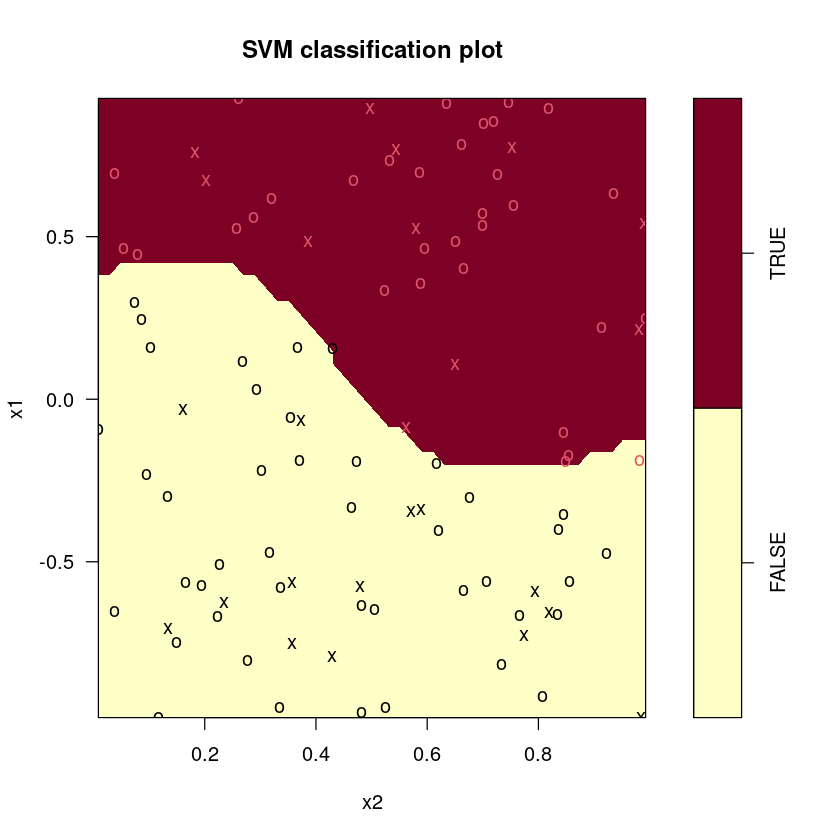

In [49]:
# Default radial kernel
pred.Cub.rad <- predict(svm.Cub.rad,dataTestCub)
table(pred.Cub.rad,dataTestCub$g) 
paste("Prediction error: ",100*(1-sum(diag(table(pred.Cub.rad,dataTestCub$g)))/ntest)," %",sep="")
plot(svm.Cub.rad,dataTestCub)

                 
pred.Cub.rad.tune FALSE TRUE
            FALSE    56    1
            TRUE      1   42

[1] "Prediction error: 2 %"

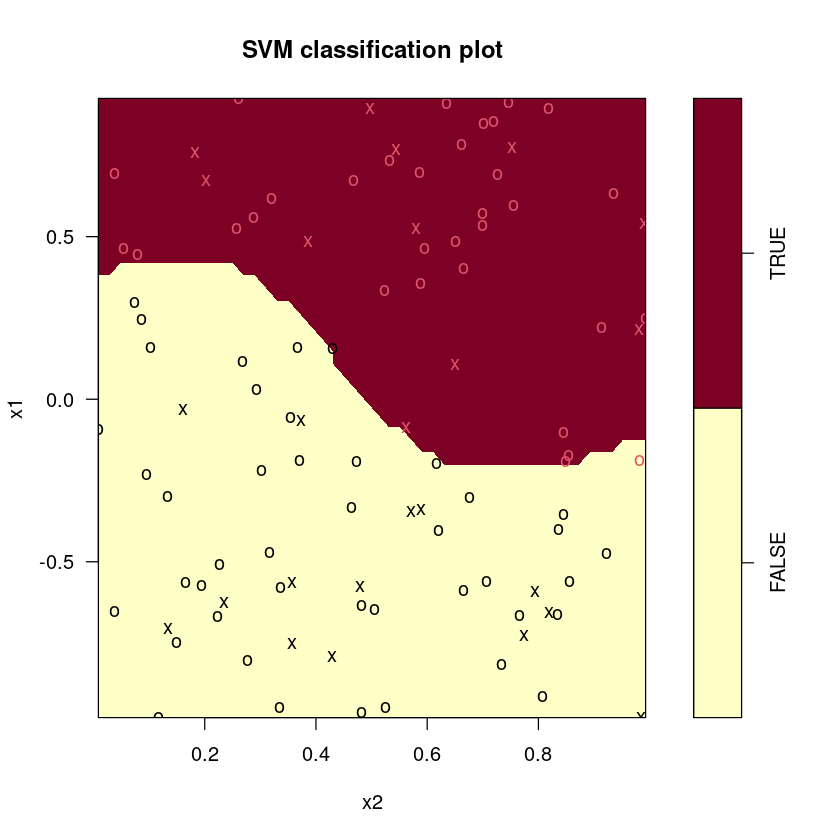

In [50]:
# Tuned radial kernel
pred.Cub.rad.tune <- predict(svm.Cub.rad.tune$best.model,dataTestCub)
table(pred.Cub.rad.tune,dataTestCub$g) 
paste("Prediction error: ",round(100*(1-sum(diag(table(pred.Cub.rad.tune,dataTestCub$g)))/ntest),1)," %",sep="")
plot(svm.Cub.rad.tune$best.model,dataTestCub)

In [51]:
# Prediction accuracies
paste("Linear kernel:",round(100*(1-sum(diag(table(pred.Cub.lin,dataTestCub$g)))/ntest),1),"%",sep=" ")
paste("Default polynomial kernel:",round(100*(1-sum(diag(table(pred.Cub.poly,dataTestCub$g)))/ntest)),"%",sep=" ")
paste("Tuned polynomial kernel:",round(100*(1-sum(diag(table(pred.Cub.poly.tune,dataTestCub$g)))/ntest)),"%",sep=" ")
paste("Default radial kernel:",round(100*(1-sum(diag(table(pred.Cub.rad,dataTestCub$g)))/ntest)),"%",sep=" ")
paste("Tuned radial kernel:",round(100*(1-sum(diag(table(pred.Cub.rad.tune,dataTestCub$g)))/ntest)),"%",sep=" ")

[1] "Linear kernel: 3 %"

[1] "Default polynomial kernel: 4 %"

[1] "Tuned polynomial kernel: 4 %"

[1] "Default radial kernel: 2 %"

[1] "Tuned radial kernel: 2 %"

**Q:** Conclude. 

# Absolute value boundary

In this section, we assume that the points are separated by an absolute value function. 

## Data simulation

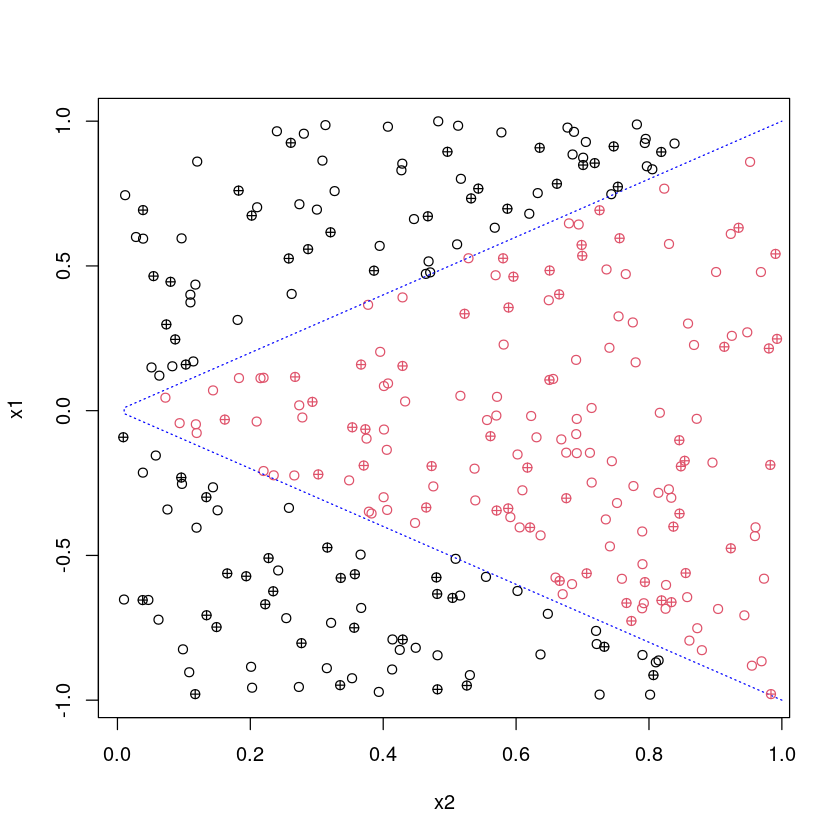

In [52]:
boundFunAbs <- function(x1){
  abs(x1)
}

# Training set
gAbs <- (x2 > boundFunAbs(x1))
gAbs <- as.factor(gAbs)
dataTrainAbs <- data.frame(x1 = x1, x2 = x2, g = gAbs)
plot(x2, x1, col=as.numeric(gAbs))
lines(boundFunAbs(t), t, col="blue", lty = "dotted")

# Test set
gAbstest <- as.factor(x2test > boundFunAbs(x1test))
dataTestAbs <- data.frame(x1 = x1test, x2 = x2test, g = gAbstest)
points(x2test, x1test, col=as.numeric(gAbstest),pch=10)

## Radial SVM

### Radial kernel with default parameters

**Q:** Train a first SVM classifier `svm.Abs.rad` based on a radial kernel with default parameters. 

### Radial kernel with `cost=1000`

**Q:** Train a second SVM classifier `svm.Abs.rad.cost1000` based on a radial kernel with default parameters, with `cost=1000`. What can you observe? 
What is the effect of the cost w.r.t. overfitting?

### Tuned radial model

**Q:** Tune a third model `svm.Abs.rad.tune` based on a radial kernel by cross validation. The parameters can be taken in the following grids: 
- `gamma = seq(0.1, 2, by = 0.2)`, 
- `cost = c(1, 25, 50, 75, 100, 150, 200)`. 

**Q:** For which parameters is the generalization error the smallest? What is its value in that case? 

**Q:** Plot the generalization error w.r.t `gamma` and `cost`. What do you observe?

## Test set prediction

**Q:** Compare the three radial models `svm.Abs.rad`, `svm.Abs.rad.tune.cost1000` and `svm.Abs.rad.tune` on the test set (in terms of contingency table and generalization error). Comment. 

# Sine boundary

## Data simulation

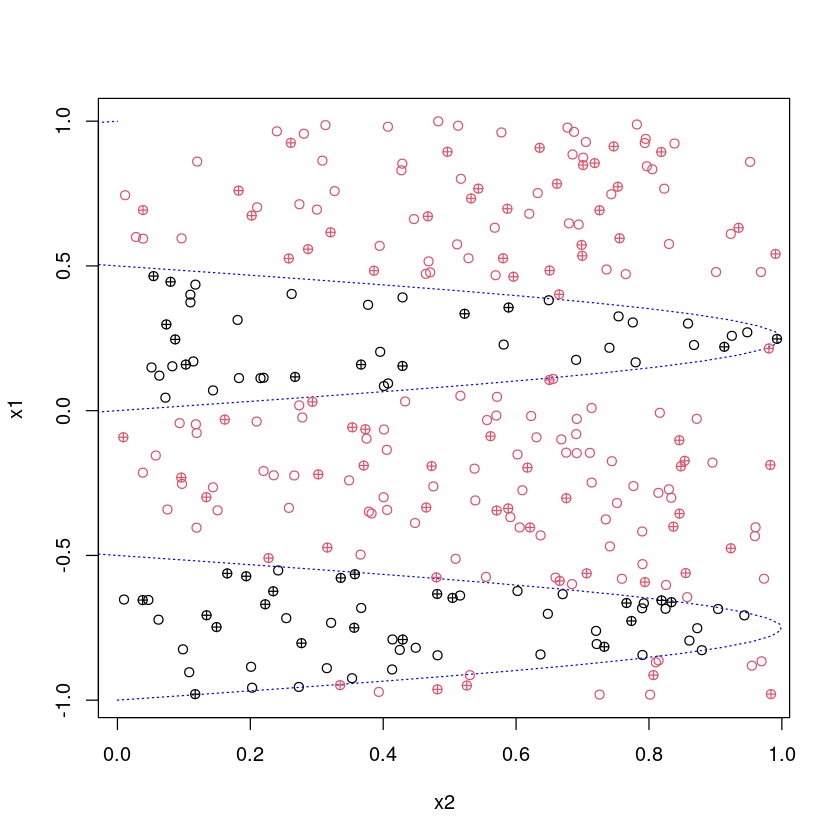

In [53]:
boundFunSin <- function(x1){
  sin(2*pi*x1)
}

# Training set
gSin <- (x2 > boundFunSin(x1))
gSin <- as.factor(gSin)
dataTrainSin <- data.frame(x1 = x1, x2 = x2, g = gSin)
plot(x2, x1, col=as.numeric(gSin))
lines(boundFunSin(t), t, col="blue", lty = "dotted")

# Test set
gSintest <- as.factor(x2test > boundFunSin(x1test))
dataTestSin <- data.frame(x1 = x1test, x2 = x2test, g = gSintest)
points(x2test, x1test, col=as.numeric(gSintest),pch=10)


**Q:** Same questions as for the Absolute value boundary case (with radial kernels). 

## Radial SVM

### Default parameters

### With `cost=1000`

### Tuned model

## Model comparison

### Validation error (by cross validation)

### Test set prediction

# Disk boundary

## Data simulation

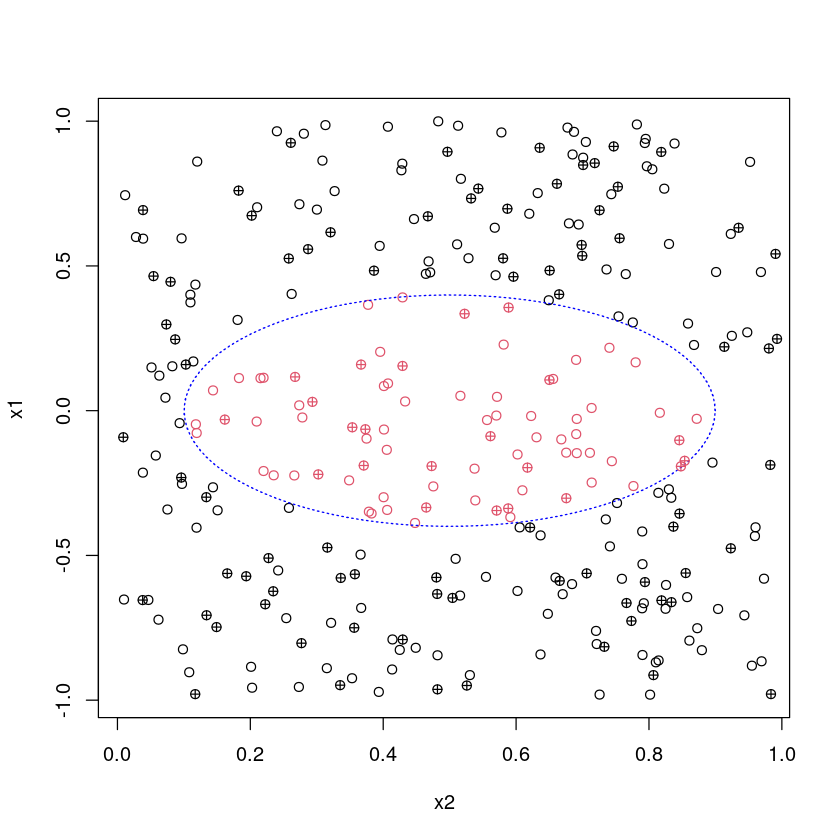

In [54]:
boundFunDisk <- function(x1, x2){
   x1^2 + (x2 - 1/2)^2
}
r <- 0.4

# Training set
gDisk <- as.factor(boundFunDisk(x1, x2) < r^2)
dataTrainDisk <- data.frame(x1 = x1, x2 = x2, g = gDisk)
plot(x2, x1, col=as.numeric(gDisk))
lines(1/2 + r * cos(2*pi*t), r * sin(2*pi*t), col="blue", lty = "dotted")

# Test set
gDisktest <- as.factor(boundFunDisk(x1test, x2test) < r^2)
dataTestDisk <- data.frame(x1 = x1test, x2 = x2test, g = gDisktest)
points(x2test, x1test, col=as.numeric(gDisktest),pch=10)


**Q:** Same questions as for the Absolute value boundary case (with polynomial and radial kernels). 

## Polynomial SVM

### Default parameters

### Tuned model

## Radial SVM 

### Default parameters

### Tuned model

## Model comparison

### Validation error (by cross validation)

### Test set prediction